<img src="https://github.com/Kesterchia/Institute-of-Data/blob/master/Project%202/Images/Kickstarter-Celebrates-10-Years-of-Funding.jpg?raw=true" width="420" height="420"> 

# About the Kickstarter dataset:


### Source

Data obtained from: https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv


### Content

This dataset contains about 400,000 rows of data collected on crowdfunding projects hosted on Kickstarter.com.


Columns are self explanatory except:

usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).

usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).

usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).

### Acknowledgements

Data are collected from Kickstarter Platform

usd conversion (usdpledgedreal and usdgoalreal columns) were generated from convert ks pledges to usd script done by tonyplaysguitar

# Problem statement: 

## What causes kickstarter projects to be successful?

This project aims to deliver some insights into what makes a failed or successful kickstarter project. 

Kickstarter.com is a crowdfunding platform that provides entrepreneurs with an alternative to traditional bank loans. 

In [41]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [42]:
#Read in data (CSV)

df = pd.read_csv('ks-projects-201801.csv', index_col = 'ID')

#Note: Remember to read in ID as the index column!

In [43]:
#Check the size of the dataset:

print('No. of rows:', df.shape[0])
print('No. of columns:',df.shape[1])

No. of rows: 378661
No. of columns: 14


In [44]:
#Check first few rows of data:

df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Part 1: Data cleaning

### Cleaning the target variable: 'State'

In [45]:
#Check the unique values of the target variable

df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [46]:
#Only keep projects that are either failed or successful

df = df[df['state'].isin(['failed','successful'])]

In [47]:
#Checking target variable counts again

df['state'].value_counts()

failed        197719
successful    133956
Name: state, dtype: int64

### Cleaning null values

In [48]:
#Check null values
df.isnull().sum()

name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
dtype: int64

In [49]:
#Not many null values, so we can just drop them

df = df.dropna()

#Check null values again:

df.isnull().sum()

name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

# Part 2: EDA and feature engineering

### Target variable:

In [50]:
df['state'].value_counts().index

Index(['failed', 'successful'], dtype='object')

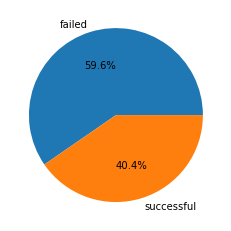

In [51]:
#Show the failure rate of projects

plt.pie(x = df['state'].value_counts(),
        labels = df['state'].value_counts().index,
        autopct='%1.1f%%')

plt.show()

## Checking for categories of projects:

<AxesSubplot:ylabel='main_category'>

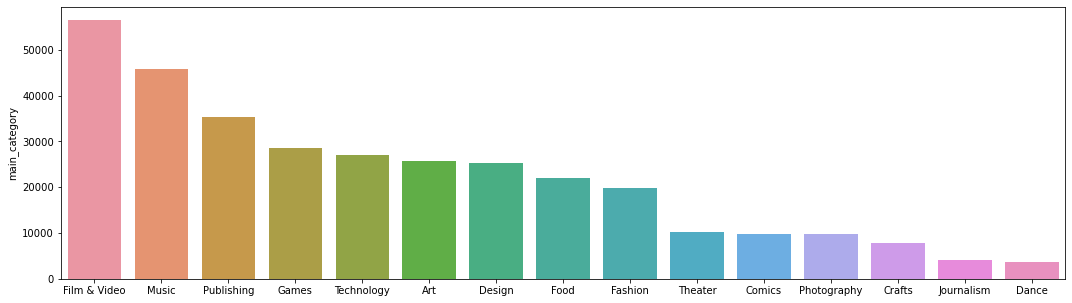

In [52]:
#Check the typical categories for projects

plt.figure(figsize = (18,5))

sns.barplot(x =  df['main_category'].value_counts().index,
            y =  df['main_category'].value_counts())

In [53]:
#Seems like project distribution is pretty balanced, a good variety of all kinds of projects except for the last few

## Checking 'currency':

In [54]:
df['currency'].value_counts()

USD    261358
GBP     29453
EUR     14357
CAD     12370
AUD      6616
SEK      1509
MXN      1411
NZD      1274
DKK       926
CHF       652
NOK       582
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

In [55]:
#Most of the projects are paid in USD, doesn't seem like an important variable

## Checking 'deadline' and 'launched':


In [56]:
df[['deadline','launched']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 1000002330 to 999988282
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   deadline  331462 non-null  object
 1   launched  331462 non-null  object
dtypes: object(2)
memory usage: 7.6+ MB


In [57]:
#Datatypes are classified as objects. They should be classified as time data instead

In [58]:
#Converting datatypes:

df = df.astype({'deadline':'datetime64',
                'launched':'datetime64'
               }
              )

In [59]:
#See if conversion is successful:

df[['deadline','launched']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 1000002330 to 999988282
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   deadline  331462 non-null  datetime64[ns]
 1   launched  331462 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 7.6 MB


### Feature engineering a new column 

Having less time before the deadline might reasonably affect project success. We will create a new column to depict that:

In [60]:
#Create a new column showing time between project launch to deadline

df['Time to deadline'] = df['deadline'] - df['launched']

In [61]:
df['Time to deadline']

ID
1000002330   58 days 11:47:32
1000003930   59 days 19:16:03
1000004038   44 days 23:39:10
1000007540   29 days 20:35:49
1000014025   34 days 10:21:33
                   ...       
999975836    29 days 01:51:38
999977640    26 days 20:24:46
999986353    45 days 04:19:30
999987933    30 days 05:46:07
999988282    27 days 14:52:13
Name: Time to deadline, Length: 331462, dtype: timedelta64[ns]

In [62]:
#Note: Time delta information is stored in pandas in nanoseconds (10^-9).

In [63]:
#Example: 
print(df['Time to deadline'][1:2])
print('\t')
print(df['Time to deadline'][1:2].values /1000 /1000 /1000 #Convert to seconds 
                                              /60 #to Minutes
                                              /60 #to Hours
                                              /24)#to Days

ID
1000003930   59 days 19:16:03
Name: Time to deadline, dtype: timedelta64[ns]
	
[59]


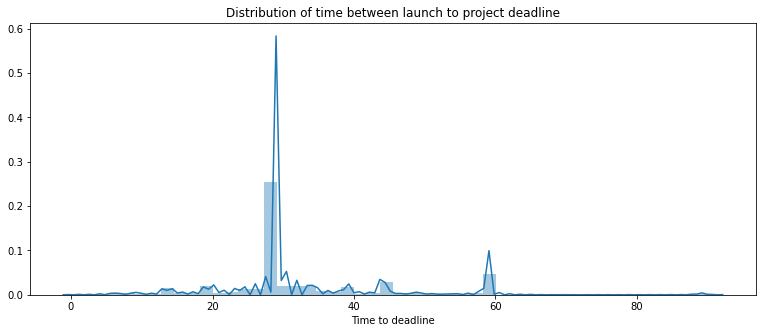

In [64]:
plt.figure(figsize = (13,5))

sns.distplot(df['Time to deadline'].dt.days)

plt.title('Distribution of time between launch to project deadline')
plt.show()

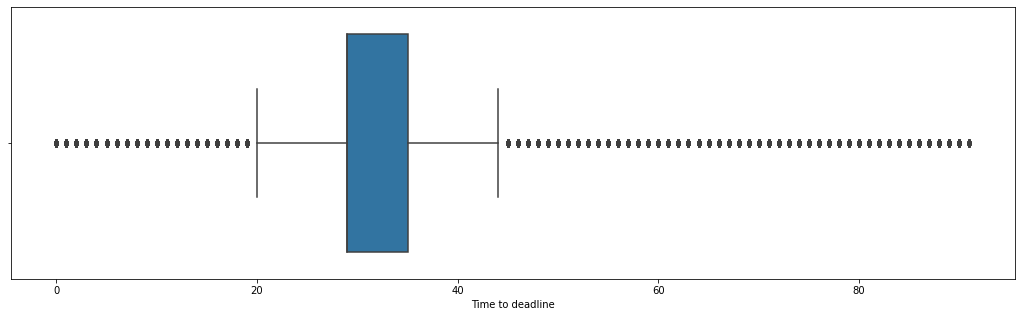

In [65]:
plt.figure(figsize=(18,5))

sns.boxplot(df['Time to deadline'].dt.days)

plt.show()

In [66]:
#Definitely high variation in time to deadline, with most projects falling between 20 to 40 days

### Checking 'backers' feature

In [67]:
df['backers'].describe()

count    331462.000000
mean        116.456315
std         965.732911
min           0.000000
25%           2.000000
50%          15.000000
75%          63.000000
max      219382.000000
Name: backers, dtype: float64

<AxesSubplot:xlabel='backers'>

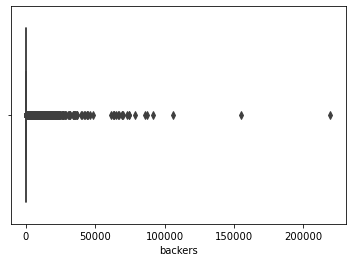

In [68]:
sns.boxplot(df['backers'])

Most projects are actually very close to 0 backers - This makes sense since the failure rate is about 40%

I will also remove rows with extremely high amounts of backers (above 98th percentile), since its reasonable to assume these projects will almost certainly be successful

In [69]:
#Removing rows above the 98th percentile:

df['backers'] = df[df['backers'] < np.quantile(df['backers'],0.98)]['backers']

In [70]:
df['backers'].describe()

count    324831.000000
mean         57.207332
std         113.427217
min           0.000000
25%           2.000000
50%          14.000000
75%          58.000000
max         908.000000
Name: backers, dtype: float64

<AxesSubplot:xlabel='backers'>

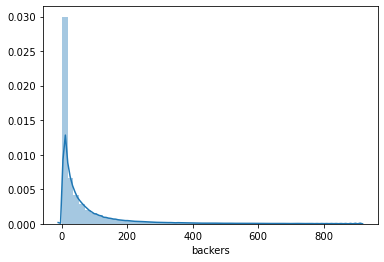

In [71]:
sns.distplot(df['backers'])

<AxesSubplot:xlabel='backers'>

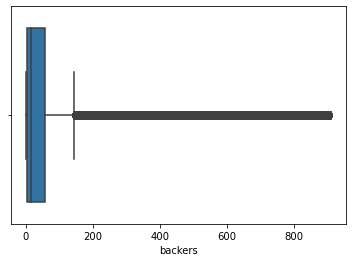

In [72]:
sns.boxplot(df['backers'])

In [73]:
# Distribution still looks very skewed, but at least it's not as extreme as before

In [74]:
df['usd_goal_real'].describe()

count    3.314620e+05
mean     4.152286e+04
std      1.109279e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

<AxesSubplot:xlabel='usd_goal_real'>

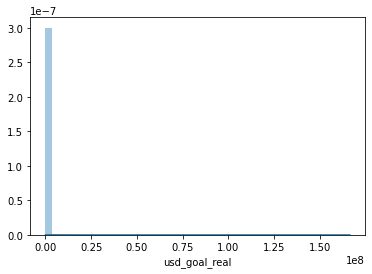

In [77]:
sns.distplot(df['usd_goal_real'])

In [35]:
#Remove both top and bottom 1 percentile: 

df['usd_goal_real'] = df[
         (df['usd_goal_real'] > np.quantile(df['usd_goal_real'],0.01)) & 
         (df['usd_goal_real'] < np.quantile(df['usd_goal_real'],0.99))
                        ]['usd_goal_real']

<AxesSubplot:xlabel='usd_goal_real'>

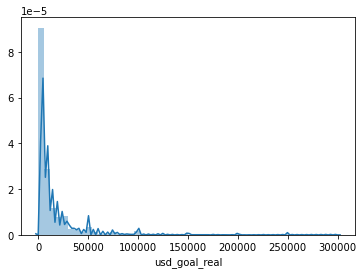

In [36]:
sns.distplot(df['usd_goal_real'])

In [37]:
df.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'Time to deadline'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 1000002330 to 999988282
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   name              331462 non-null  object         
 1   category          331462 non-null  object         
 2   main_category     331462 non-null  object         
 3   currency          331462 non-null  object         
 4   deadline          331462 non-null  datetime64[ns] 
 5   goal              331462 non-null  float64        
 6   launched          331462 non-null  datetime64[ns] 
 7   pledged           331462 non-null  float64        
 8   state             331462 non-null  object         
 9   backers           324831 non-null  float64        
 10  country           331462 non-null  object         
 11  usd pledged       331462 non-null  float64        
 12  usd_pledged_real  331462 non-null  float64        
 13  usd_goal_real     324791 non-nul

<AxesSubplot:>

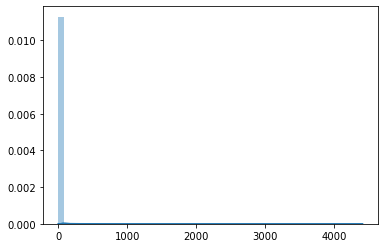

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
sns.distplot(scaler.fit_transform(df[['pledged']]))


In [40]:
q_90 = np.quantile(df['pledged'],0.80)
q_10 = np.quantile(df['pledged'],0.1)

sns.distplot(df[df['pledged'] < q_80]['pledged'])


NameError: name 'q_80' is not defined

# Create new feature: How long before deadline